In [ ]:
# https://ermongroup.github.io/cs228-notes/learning/latent/

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
# 1D, 2-component GMM

In [15]:
def get_data(n_samples):
    # component 1
    # N(-5, 1)
    p1 = np.random.normal(-5, 1, n_samples//2)
    
    # component 2
    # N(5, 1)
    p2 = np.random.normal(5, 1
                          , n_samples//2)
    
    return np.concatenate((p1, p2))

In [25]:
x = get_data(1000)

In [36]:
x_domain = np.arange(np.min(x), np.max(x), 0.1)

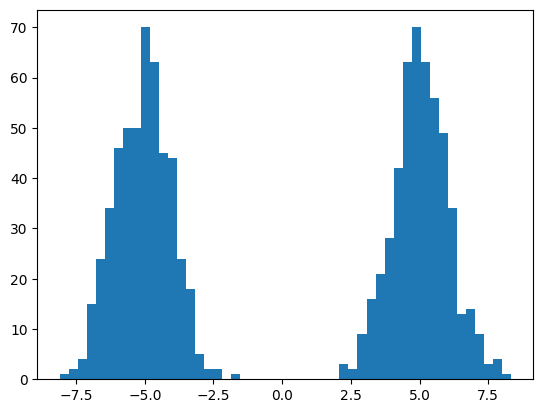

In [26]:
plt.hist(x, bins=50);

In [40]:
def prior_z(z):
    if z == 1:
        return 0.5
    elif z == 2:
        return 0.5

In [41]:
prior_z(1)

0.5

In [42]:
prior_z(2)

0.5

In [43]:
def likelihood(x, theta):
    # conditional likelihood of data given z
    # however, z is parameterised by theta
    loc, scale = theta
    return scipy.stats.norm(loc, scale).pdf(x)

In [44]:
likelihood(x[0], [0, 1])

0.000332812053558179

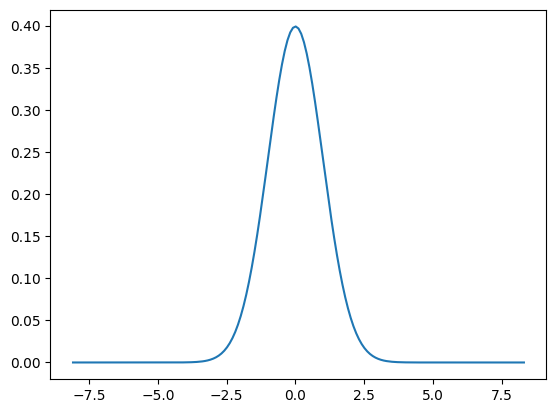

In [45]:
plt.plot(x_domain, likelihood(x_domain, [0, 1]))

In [58]:
def posterior(z, x):
    # p(z|x)
    theta = z_dict[z]
    return -np.mean(np.log(likelihood(x, theta)) + np.log(prior_z(z)))
    

In [59]:
# for a given mixture compontent z
# we have a set of parameters
# i.e. the loc, scale of the gaussian
z_dict = {
    1: [-5,1],
    2: [5, 1]
}

In [61]:
posterior(z=1, x=x[x<0])

2.106923137054744

In [63]:
posterior(z=2, x=x[x>0])

2.1427866803847384